In [316]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import decomposition
from random import sample
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import preprocessing

In [317]:
datos = pd.read_excel('breast-cancer-wisconsin.xlsx')
datos

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Clasificacion
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


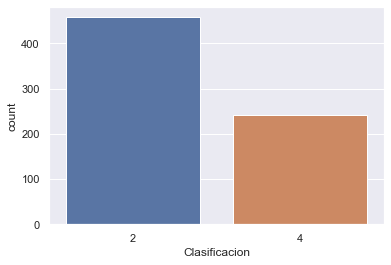

In [318]:
# Distribución
sns.countplot(datos["Clasificacion"])

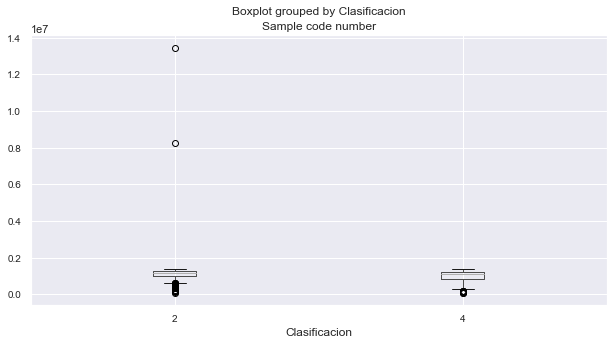

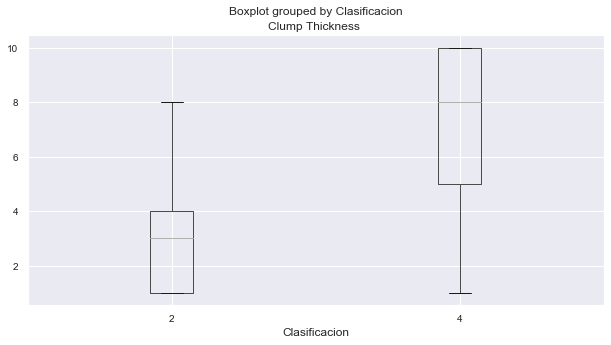

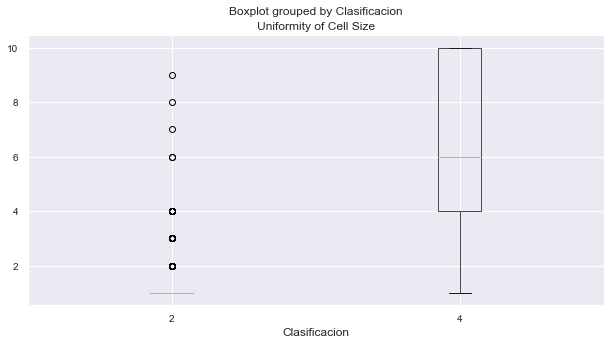

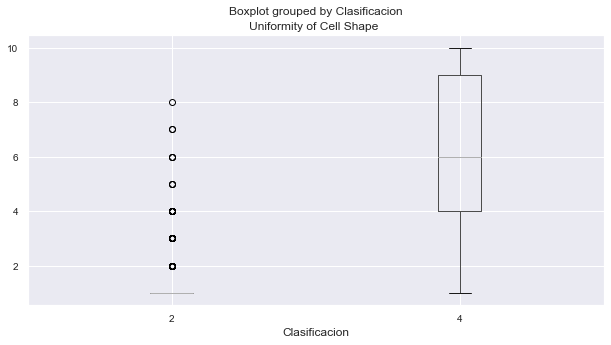

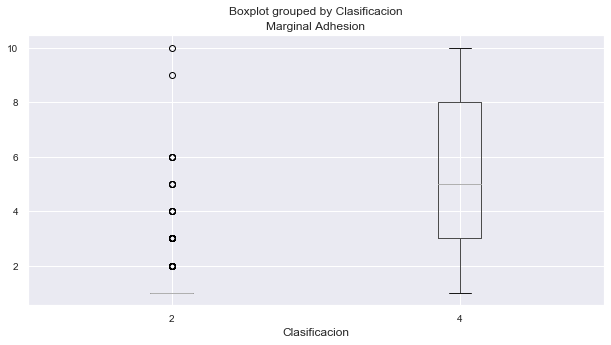

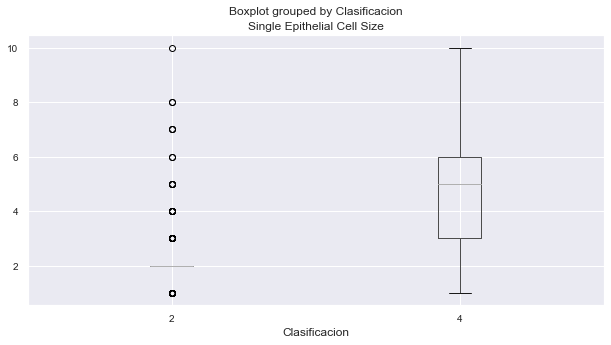

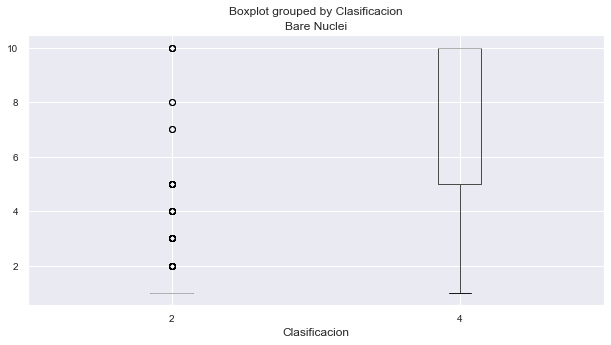

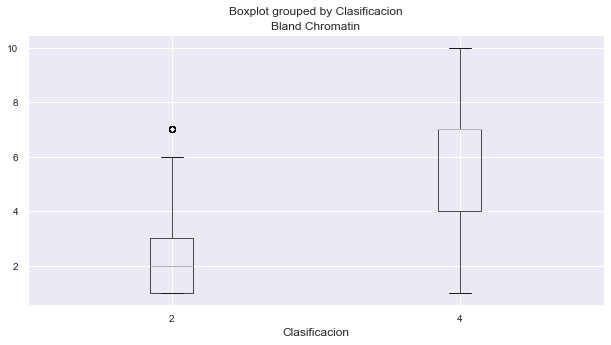

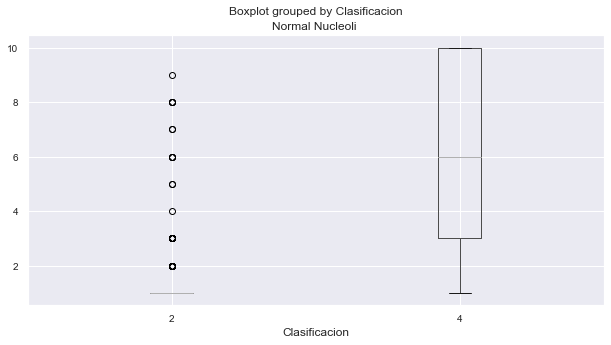

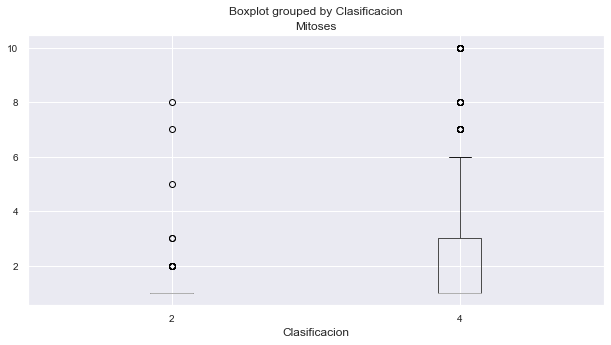

In [319]:
#BOXPLOT de cada caracteristica con la variable diagnosis
for i in ['Sample code number','Clump Thickness ','Uniformity of Cell Size','Uniformity of Cell Shape ','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli ','Mitoses']:
    boxplot = datos.boxplot(column=i, by='Clasificacion', fontsize=10,figsize=(10,5),)
    plt.show()
    

# El diagrama de cajas
El diagrama de cajas nos proporciona informacion de como esta distribuida la informacion, las cajas representan cada uno de los tres quartiles, el 25, 50 y 75% y la diferencia entre el primero y el tercero nos dice el rango intercuartil, mientras que los pequeños bigotes son los datos atipicos, ellos nos representan donde esta contenida la mayoria de la informacion 
Como se puede ver se pueden descartar varias caracteristicas que no aportan informacion al problema, pero no o haremos para permitir que el clasificador haga este trabajo, estas caracteristicas seran las Fse que menciono el profesor en la clase.

In [320]:
# Correlación
correlacion_estudiantes_base=datos.corr()
correlacion_estudiantes_base.style.background_gradient(cmap='coolwarm')

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Clasificacion
Sample code number,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.097093,-0.060051,-0.052072,-0.034901,-0.080226
Clump Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.585246,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.684512,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.704487,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666674,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.581420,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,-0.097093,0.585246,0.684512,0.704487,0.666674,0.581420,1.000000,0.672860,0.574641,0.338657,0.810944
Bland Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.672860,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574641,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.338657,0.344169,0.428336,1.000000,0.423170


# Diagrama de correlación
Tambien podemos hacer un diagrama de correlación, donde los valores cercanos a 1 son los que se relacionan mas entre si, y los cercanos a 0 los que no tienen ninguna relacion, por simplicidad analizaremos el diagrama de cajas



# Filtramos los registros
Eliminamos las columnas que no nos aportan información, como es el Sample code number

In [321]:
data=datos.drop(['Sample code number'],axis=1)
data 

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Clasificacion
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


# Se procede a normalizar la base de datos
En todo analisis de datos, es imprecindible la normalizacion de los datos antes de usar uno de los metodos de extraccion de caracteristicas


In [322]:
for i in ['Clump Thickness ','Uniformity of Cell Size','Uniformity of Cell Shape ','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli ','Mitoses']:
    data[i] = (data[i]-data[i].min())/(data[i].max()-data[i].min())
data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Clasificacion
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,2
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000,2
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000,2
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000,2
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...
694,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000,2
695,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,2
696,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111,4
697,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000,4


# Se procede a dividir los datos, la llegada como las caracteristicas

In [327]:
X=data.iloc[:,0:9] ## Corresponde a las caracteristicas sin la variable de llegada quality
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
694,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000
695,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
696,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111
697,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000


In [328]:
Y = data.iloc[:,9:10]
Y

,Clasificacion
0,2
1,2
2,2
3,2
4,2
...,...
694,2
695,2
696,4
697,4


# Las etiquetas seran 2 para benigno, 4 maligno

# PCA
Aplicaremos PCA para la extracción de las caracteristicas y con esto reducir su dimensión y facilitar el analisis del algoritmo de clasificacion y obtener el numero de caracteristicas principales, las cuales usaremos las mismas 8 para no perder mas caracteristicas que con el analisis de caja se comprobo que son utiles, fsx = 8

In [329]:
# PCA 
pca = decomposition.PCA(n_components=9)
X1 = pca.fit_transform(X)

# FSE:FSX

In [330]:
X_FSEX =pd.DataFrame({'PCA1': X1[:,0], 'PCA2': X1[:,1],'PCA3': X1[:,2], 'PCA4': X1[:,3],'PCA5': X1[:,4],'PCA6': X1[:,5],'PCA7': X1[:,6],'PCA8': X1[:,7],'PCA9': X1[:,8]})
X_FSEX

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-0.492663,0.014339,-0.193276,0.012705,-0.092356,-0.068896,-0.116057,0.009926,-0.000745
1,0.538478,-0.541848,0.095448,0.077466,0.116375,0.243609,0.054257,0.342113,-0.003829
2,-0.510046,-0.067319,0.003101,-0.034254,0.015298,-0.027084,-0.104950,-0.012508,0.004238
3,0.572246,0.386217,-0.225327,-0.192687,0.364318,-0.084489,0.368358,-0.151920,0.069525
4,-0.452058,-0.007182,0.006131,0.097837,-0.187592,-0.102889,-0.070300,0.023525,-0.010846
...,...,...,...,...,...,...,...,...,...
694,-0.547203,-0.049469,-0.014366,-0.003420,0.019320,0.124001,0.041075,0.108234,0.009565
695,-0.656944,0.021445,0.067516,0.001547,0.024855,0.061381,0.069167,0.016250,0.015378
696,1.147144,0.802611,0.088890,-0.138779,0.448630,-0.182897,-0.024048,-0.019364,-0.023171
697,0.717064,0.275415,0.202052,-0.060609,0.244577,-0.483376,-0.273146,-0.218338,0.136060


In [331]:
X_con_F = pd.concat([X_FSEX, X], axis=1)
X_con_F

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,-0.492663,0.014339,-0.193276,0.012705,-0.092356,-0.068896,-0.116057,0.009926,-0.000745,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
1,0.538478,-0.541848,0.095448,0.077466,0.116375,0.243609,0.054257,0.342113,-0.003829,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000
2,-0.510046,-0.067319,0.003101,-0.034254,0.015298,-0.027084,-0.104950,-0.012508,0.004238,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000
3,0.572246,0.386217,-0.225327,-0.192687,0.364318,-0.084489,0.368358,-0.151920,0.069525,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000
4,-0.452058,-0.007182,0.006131,0.097837,-0.187592,-0.102889,-0.070300,0.023525,-0.010846,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,-0.547203,-0.049469,-0.014366,-0.003420,0.019320,0.124001,0.041075,0.108234,0.009565,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000
695,-0.656944,0.021445,0.067516,0.001547,0.024855,0.061381,0.069167,0.016250,0.015378,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
696,1.147144,0.802611,0.088890,-0.138779,0.448630,-0.182897,-0.024048,-0.019364,-0.023171,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111
697,0.717064,0.275415,0.202052,-0.060609,0.244577,-0.483376,-0.273146,-0.218338,0.136060,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000


# SFS y SBS
Utilizaremos las tecnicas SFS y SBS para seleccionar las caracteristicas y ademas utilizaremos maquinas de soporte vectorial para la clasificacion

In [332]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.svm import SVC
# Sequential Forward Selection(sfs)
sfs = SFS(SVC(kernel='rbf',C=1.0,gamma=1.0),
           k_features=9,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)

In [333]:
sbs = SFS(SVC(kernel='rbf',C=1.0,gamma=1.0),
           k_features=9,
           forward=False,
           floating=False,
           scoring = 'r2',
           cv = 0)

In [334]:
#FSEs-sfs
sfs.fit (X, Y) 
sfs.k_feature_names_ 

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

('Clump Thickness ',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape ',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli ',
 'Mitoses')

In [335]:
#FSEs-sbs
sbs.fit (X, Y) 
sbs.k_feature_names_ 

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


('Clump Thickness ',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape ',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli ',
 'Mitoses')

In [336]:
#FSXs-sfs
sfs.fit (X_FSEX, Y) 
sfs.k_feature_names_ 

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

('PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9')

In [337]:
#FSXs-sbs
sbs.fit (X_FSEX, Y) 
sbs.k_feature_names_

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


('PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9')

In [338]:
#FSXs:FSEs-sbs
sbs.fit (X_con_F, Y) 
sbs.k_feature_names_

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

('PCA1',
 'PCA2',
 'PCA3',
 'PCA4',
 'PCA5',
 'PCA7',
 'PCA8',
 'Uniformity of Cell Size',
 'Normal Nucleoli ')

In [339]:
#FSXs:FSEs-sfs
sfs.fit (X_con_F, Y) 
sfs.k_feature_names_

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

('PCA1',
 'PCA2',
 'PCA3',
 'PCA4',
 'PCA5',
 'PCA8',
 'PCA9',
 'Uniformity of Cell Shape ',
 'Normal Nucleoli ')

# Eliminar caracteristicas que no suelta el clasificador

In [340]:
import copy
Xsfs = copy.copy(X_con_F)
Xsbs = copy.copy(X_con_F)
Xsbs = Xsbs.drop(columns=['PCA6','PCA9','Clump Thickness ','Uniformity of Cell Shape ','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Mitoses'], axis=1)
Xsfs = Xsfs.drop(columns=['PCA6','PCA7','Clump Thickness ','Uniformity of Cell Size','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Mitoses'], axis=1)

# Se separa los datos de prueba con los datos de entrenamiento
Este es un proceso vital para que el sistema quede bien entrenado y pueda responder de manera correcta cuando se le ingresa un dato desconocido

In [341]:
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.2,random_state=40) # fse
X_FSEX_test,X_FSEX_train,Ye_test,Ye_train=train_test_split(X_FSEX,Y,test_size=0.2,random_state=40) #fsx
X_con_F_test,X_con_F_train,yef_test,yef_train=train_test_split(X_con_F,Y,test_size=0.2,random_state=40) #fsx:fse
Xsbs_test,Xsbs_train,ysbs_test,ysbs_train=train_test_split(Xsbs,Y,test_size=0.2,random_state=40) # (fse:fsx))s(sbs)
Xsfs_test,Xsfs_train,ysfs_test,ysfs_train=train_test_split(Xsfs,Y,test_size=0.2,random_state=40) # (fse:fsx)s(sfs)

# SVC

In [342]:
cls1=SVC(kernel='rbf',C=1.0,gamma=1.0)
cls2=SVC(kernel='rbf',C=1.0,gamma=1.0)
cls3=SVC(kernel='rbf',C=1.0,gamma=1.0)
cls4=SVC(kernel='rbf',C=1.0,gamma=1.0)
cls5=SVC(kernel='rbf',C=1.0,gamma=1.0)

In [343]:
cls1.fit(X_train,Y_train)
cls2.fit(X_FSEX_train,Ye_train)
cls3.fit(X_con_F_train,yef_train)
cls4.fit(Xsbs_train,ysbs_train)
cls5.fit(Xsfs_train,ysfs_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y,

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [344]:
predict_test1 = cls1.predict(X_test)
predict_test2 = cls2.predict(X_FSEX_test)
predict_test3 = cls3.predict(X_con_F_test)
predict_test4 = cls4.predict(Xsbs_test)
predict_test5 = cls5.predict(Xsfs_test)

In [346]:
print("Accuracy 1: {:.1f} %, FSE".format(metrics.accuracy_score(predict_test1,Y_test)*100))
print("Accuracy 2: {:.1f} %, FSX".format(metrics.accuracy_score(predict_test2,Ye_test)*100))
print("Accuracy 3: {:.1f} %, FSE:FSX".format(metrics.accuracy_score(predict_test3,yef_test)*100))
print("Accuracy 4: {:.1f} % (FSX:FSE)sbs".format(metrics.accuracy_score(predict_test4,ysbs_test)*100))
print("Accuracy 5: {:.1f} % (FSX:FSE)sfs".format(metrics.accuracy_score(predict_test5,ysfs_test)*100))

Accuracy 1: 97.0 %, FSE
Accuracy 2: 97.0 %, FSX
Accuracy 3: 96.8 %, FSE:FSX
Accuracy 4: 97.1 % (FSX:FSE)sbs
Accuracy 5: 97.3 % (FSX:FSE)sfs
